# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
df = pd.read_csv('previsao_de_renda.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [5]:
# Convertendo variáveis categóricas para tipo 'category' se necessário
df['posse_de_veiculo'] = df['posse_de_veiculo'].astype('category')
df['posse_de_imovel'] = df['posse_de_imovel'].astype('category')

# Verificar as categorias
print(df['posse_de_veiculo'].cat.categories)
print(df['posse_de_imovel'].cat.categories)

Index([False, True], dtype='bool')
Index([False, True], dtype='bool')


C:\Users\Joel\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


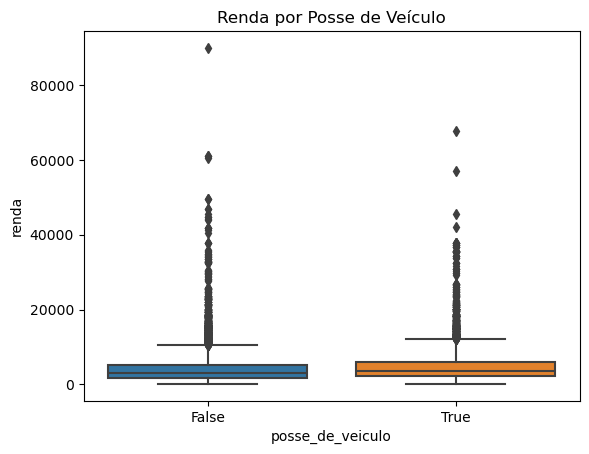

C:\Users\Joel\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


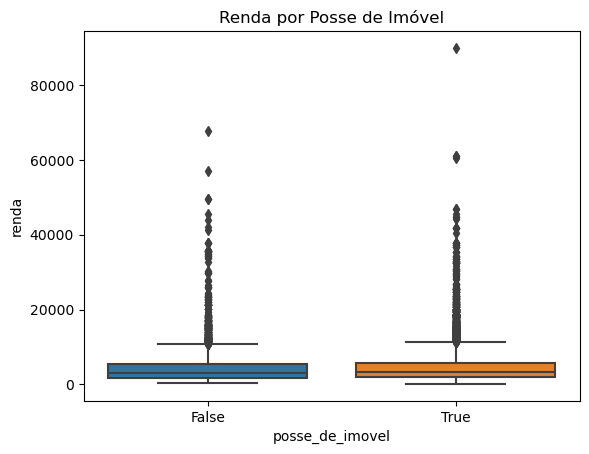

In [6]:
# Gráfico de Boxplot para posse_de_veiculo
sns.boxplot(x='posse_de_veiculo', y='renda', data=df)
plt.title('Renda por Posse de Veículo')
plt.show()

# Gráfico de Boxplot para posse_de_imovel
sns.boxplot(x='posse_de_imovel', y='renda', data=df)
plt.title('Renda por Posse de Imóvel')
plt.show()

C:\Users\Joel\AppData\Local\Temp\ipykernel_11680\2313478043.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  ax = sns.pointplot(x="posse_de_veiculo", y="renda",
C:\Users\Joel\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


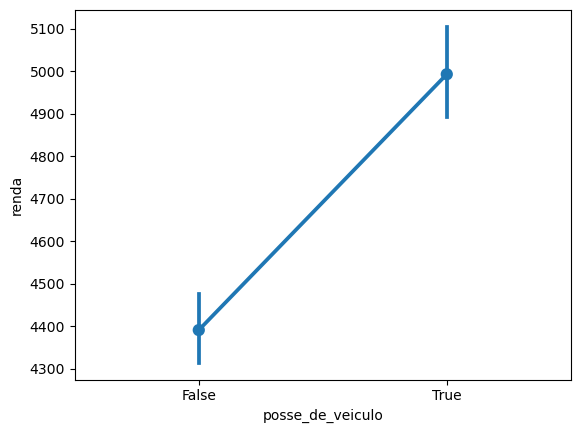

In [7]:
ax = sns.pointplot(x="posse_de_veiculo", y="renda",
                   data=df, dodge=True, ci = 90)

C:\Users\Joel\AppData\Local\Temp\ipykernel_11680\3324838221.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  ax = sns.pointplot(x="posse_de_imovel", y="renda",
C:\Users\Joel\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


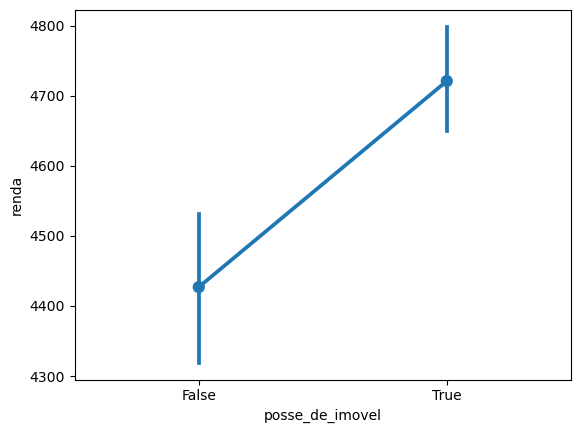

In [8]:
ax = sns.pointplot(x="posse_de_imovel", y="renda",
                   data=df, dodge=True, ci = 90)

C:\Users\Joel\AppData\Local\Temp\ipykernel_11680\2755058387.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(
C:\Users\Joel\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


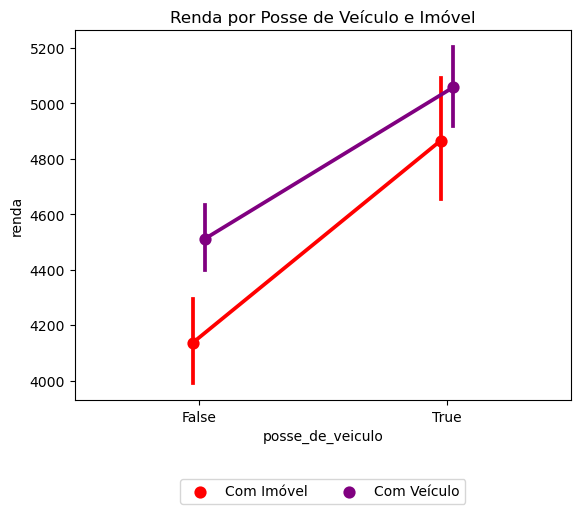

In [9]:
# Definir as paletes de cores
palette_imovel = {0: 'red', 1: 'purple'}   # Exemplo de cores para posse de imóvel

# Criar o pointplot com cores específicas
ax = sns.pointplot(
    x="posse_de_veiculo", 
    y="renda", 
    hue='posse_de_imovel', 
    data=df, 
    dodge=True, 
    ci=95,
    palette=palette_imovel
)

# Ajustar a legenda
# Captura o objeto da legenda
legend = plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), ncol=3)

# Altera os rótulos da legenda
labels = ['Com Imóvel', 'Com Veículo']  # Ajuste conforme suas categorias
for text, label in zip(legend.get_texts(), labels):
    text.set_text(label)

# Adicionar título e exibir o gráfico
plt.title('Renda por Posse de Veículo e Imóvel')
plt.show()

"A renda daqueles que possuem veículo é superior a 5.000 reais, indicando que quem tem veículo possui um poder aquisitivo maior do que aqueles que possuem imóvel."